In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import influxdb_client
import scipy

from influxdb_client.client.write_api import SYNCHRONOUS

import warnings
from influxdb_client.client.warnings import MissingPivotFunction

warnings.simplefilter("ignore", MissingPivotFunction)

# configure influxdb client
ORG = "b4mad"
TOKEN = os.environ.get(
    "INFLUXDB_TOKEN",
    "citqAMr66LLb25hvaaZm2LezOc88k2ocOFJcJDR6QB-RmLJa_-sAr9kYB4vSFYaz8bt26lm7SokVgpQKdgKFKA==",
)
URL = "https://telemetry.b4mad.racing/"

# and create the client and a quary api
client = influxdb_client.InfluxDBClient(url=URL, token=TOKEN, org=ORG)
query_api = client.query_api()

session = 1670075326
lap = 2
game = "rFactor2"
car = "Ferrari F2004"
track = "Silverstone"

In [2]:
query = f"""
from(bucket: "racing")
|> range(start: -10y, stop: now())
|> filter(fn: (r) => r["_measurement"] == "laps_cc")
|> filter(fn: (r) => r["SessionId"] == "{session}")
// |> filter(fn: (r) => r["GameName"] == "{game}")
// |> filter(fn: (r) => r["CarModel"] == "{car}")
// |> filter(fn: (r) => r["TrackCode"] == "{track}")
//|> filter(fn: (r) => r["CurrentLap"] == "{lap}")
|> pivot(rowKey: ["_time"], columnKey: ["_field"], valueColumn: "_value")
|> sort(columns: ["_time"], desc: false)
"""
df = query_api.query_data_frame(org=ORG, query=query)

,result,table,_start,_stop,_time,CarModel,CurrentLap,GameName,SessionId,SessionTypeName,...,Brake,Clutch,CurrentLapTime,DistanceRoundTrack,Gear,Handbrake,Rpms,SpeedMs,SteeringAngle,Throttle
0,_result,0,2012-12-03 03:51:54.321999+00:00,2022-12-03 15:51:54.321999+00:00,2022-12-03 14:48:44.019242+00:00,Ferrari 488 GT3 Evo 2020,1,iRacing,1670075326,Qualify,...,1.0,0.0,0.0,4480.0,0.0,0.0,0.0,0.0,0.0,0.0
1,_result,0,2012-12-03 03:51:54.321999+00:00,2022-12-03 15:51:54.321999+00:00,2022-12-03 14:48:44.043552+00:00,Ferrari 488 GT3 Evo 2020,1,iRacing,1670075326,Qualify,...,1.0,0.0,0.0,4480.0,0.0,0.0,0.0,0.0,0.0,0.0
2,_result,0,2012-12-03 03:51:54.321999+00:00,2022-12-03 15:51:54.321999+00:00,2022-12-03 14:48:44.077457+00:00,Ferrari 488 GT3 Evo 2020,1,iRacing,1670075326,Qualify,...,1.0,0.0,0.0,4480.0,0.0,0.0,0.0,0.0,0.0,0.0
3,_result,0,2012-12-03 03:51:54.321999+00:00,2022-12-03 15:51:54.321999+00:00,2022-12-03 14:48:44.105477+00:00,Ferrari 488 GT3 Evo 2020,1,iRacing,1670075326,Qualify,...,1.0,0.0,0.0,4480.0,0.0,0.0,0.0,0.0,0.0,0.0
4,_result,0,2012-12-03 03:51:54.321999+00:00,2022-12-03 15:51:54.321999+00:00,2022-12-03 14:48:44.139899+00:00,Ferrari 488 GT3 Evo 2020,1,iRacing,1670075326,Qualify,...,1.0,0.0,0.0,4480.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,_result,0,2012-12-03 03:51:54.321999+00:00,2022-12-03 15:51:54.321999+00:00,2022-12-03 14:48:47.753669+00:00,Ferrari 488 GT3 Evo 2020,1,iRacing,1670075326,Qualify,...,1.0,0.0,0.0,4480.0,0.0,0.0,0.0,0.0,0.0,0.0
116,_result,0,2012-12-03 03:51:54.321999+00:00,2022-12-03 15:51:54.321999+00:00,2022-12-03 14:48:47.783953+00:00,Ferrari 488 GT3 Evo 2020,1,iRacing,1670075326,Qualify,...,1.0,0.0,0.0,4480.0,0.0,0.0,0.0,0.0,0.0,0.0
117,_result,0,2012-12-03 03:51:54.321999+00:00,2022-12-03 15:51:54.321999+00:00,2022-12-03 14:48:47.814225+00:00,Ferrari 488 GT3 Evo 2020,1,iRacing,1670075326,Qualify,...,1.0,0.0,0.0,4480.0,0.0,0.0,0.0,0.0,0.0,0.0
118,_result,0,2012-12-03 03:51:54.321999+00:00,2022-12-03 15:51:54.321999+00:00,2022-12-03 14:48:47.844422+00:00,Ferrari 488 GT3 Evo 2020,1,iRacing,1670075326,Qualify,...,1.0,0.0,0.0,4480.0,0.0,0.0,0.0,0.0,0.0,0.0


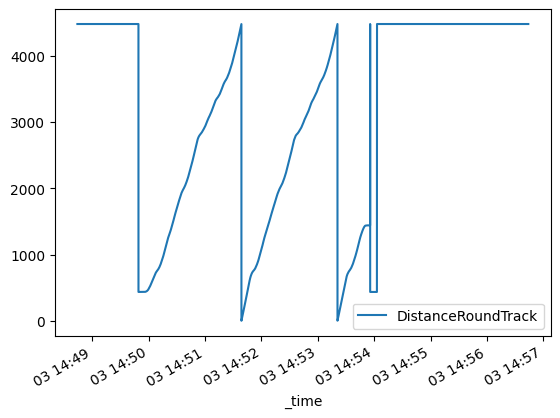

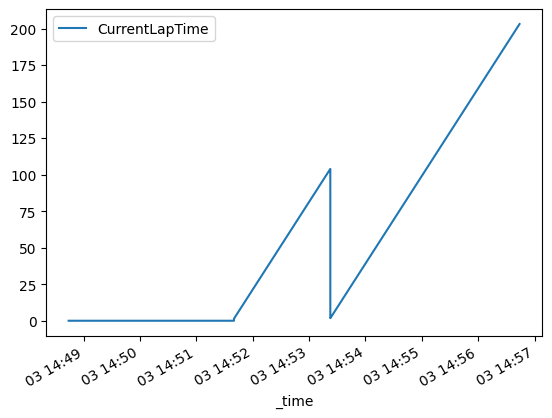

In [22]:
# show only the CurrentLapTime and DistanceOnTrack column
# df[["CurrentLapTime", "DistanceRoundTrack", "CurrentLapTime"]]

# filter CurrentLap == 1
# df[df["CurrentLap"] == "0"]

# convert CurrentLap to int
df["CurrentLap"] = df["CurrentLap"].astype(int)

# plot the CurrentLapTime and DistanceOnTrack column

# plat _time on the x axis and CurrentLapTime and CurrentLap on the y axis
df.plot(x="_time", y=["DistanceRoundTrack"])
df.plot(x="_time", y=["CurrentLapTime"])

df.head(120)